In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")

import itertools
from collections import Counter

# set default plotting parameter
sns.set_theme("paper", "darkgrid")
plt.rc("axes", titlesize=18)
plt.rc("axes", titleweight="bold")
plt.rc("axes", labelsize=13)

# Load & explore data

In [3]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.shape

(7787, 12)

In [5]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# Analyze missing values

## Show missing values using missingno

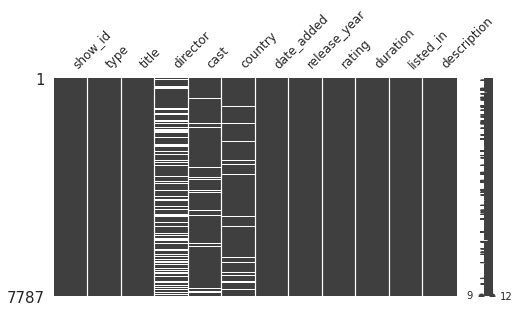

In [7]:
missingno.matrix(df, figsize=(8,4), fontsize=12);

The columns "director", "cast" and "country" containing the most missing values. We can use a heatmap visualization to get an understanding of the correlation between missing values in different columns.

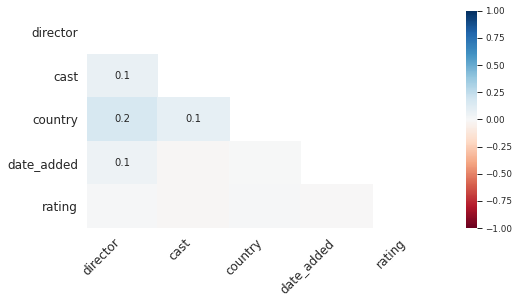

In [8]:
missingno.heatmap(df, figsize=(8,4), fontsize=12);

The highest correlation can be found between `country` and `director`, meaning that if we find a `NaN` value in `country` then it's more likely to find a `director` `NaN` as well.
This correlation includes suggestions which columns are the most promising to drop `NaN` values.

# Handle missing values

We can simply drop the rows where "date_added" contains missing values, which results in the following DataFrame.

In [9]:
# reset index fit on the shape
df = df.dropna(subset=["date_added"]).reset_index()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7777 entries, 0 to 7776
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         7777 non-null   int64 
 1   show_id       7777 non-null   object
 2   type          7777 non-null   object
 3   title         7777 non-null   object
 4   director      5398 non-null   object
 5   cast          7059 non-null   object
 6   country       7271 non-null   object
 7   date_added    7777 non-null   object
 8   release_year  7777 non-null   int64 
 9   rating        7770 non-null   object
 10  duration      7777 non-null   object
 11  listed_in     7777 non-null   object
 12  description   7777 non-null   object
dtypes: int64(2), object(11)
memory usage: 790.0+ KB


Since the remaining columns are of type string (object) we're able to fill missing values with the keyword "missing". Consequently there are no missing values anymore.

In [11]:
# fill missing values in director column
df["director"] = df.director.fillna("missing")
df["cast"] = df.cast.fillna("missing")
df["country"] = df.country.fillna("missing")
df["rating"] = df.rating.fillna("missing")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7777 entries, 0 to 7776
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         7777 non-null   int64 
 1   show_id       7777 non-null   object
 2   type          7777 non-null   object
 3   title         7777 non-null   object
 4   director      7777 non-null   object
 5   cast          7777 non-null   object
 6   country       7777 non-null   object
 7   date_added    7777 non-null   object
 8   release_year  7777 non-null   int64 
 9   rating        7777 non-null   object
 10  duration      7777 non-null   object
 11  listed_in     7777 non-null   object
 12  description   7777 non-null   object
dtypes: int64(2), object(11)
memory usage: 790.0+ KB


## Feature Engineering

1. split `date_added` into month, date and year

In [13]:
df.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,TV Show,3%,missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## 1. Split date_added into month, date and year

In [14]:
# added_*: extract day/month/year from date_added
# duration_unit: extract unit from duration as "Season" or "Minute"
# duration_quality: extract numerical value from duration irrespective 
#                   of duration_unit the given duration_unit
df = df.assign(
    added_month=pd.to_datetime(df.date_added).dt.month,
    added_date=pd.to_datetime(df.date_added).dt.day,
    added_year=pd.to_datetime(df.date_added).dt.year,
    duration_unit=np.where(df.duration.str.contains("Season"), "Season", "Minute"),
    duration_quantity=lambda x: x.duration.str.split(" ", expand=True)[0],
).drop("date_added", axis=1).astype({"duration_quantity":"int"})

df.head(2)

,index,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_month,added_date,added_year,duration_unit,duration_quantity
0,0,s1,TV Show,3%,missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,14,2020,Season,4
1,1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,23,2016,Minute,93


Checking that we didn't created any missing values leads to

In [15]:
df.isna().sum()

index                0
show_id              0
type                 0
title                0
director             0
cast                 0
country              0
release_year         0
rating               0
duration             0
listed_in            0
description          0
added_month          0
added_date           0
added_year           0
duration_unit        0
duration_quantity    0
dtype: int64

## Exploratory Data Analysis

At first we compare the number of movies agains the number of tv shows.


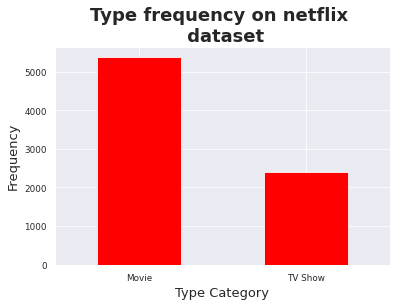

In [16]:

df.type.value_counts().plot(
    kind="bar",
    width=0.5, 
    color="red",
    title="Type frequency on netflix \n dataset",
    ylabel="Frequency", 
    xlabel="Type Category",
    rot=0
);

From the above graph we see that there are twice as many movies as tv shows on Netflix.

Furthermore we want to know which are the most common directors in our dataset.

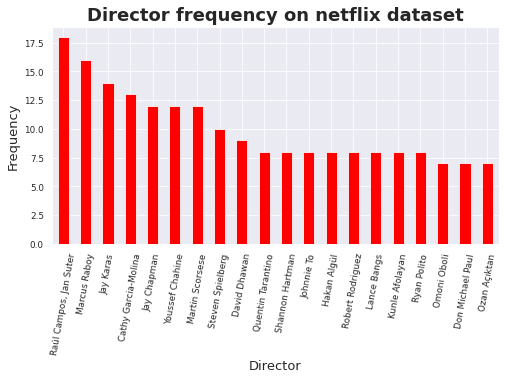

In [17]:
df.director.value_counts().drop(labels=["missing"]).head(20).plot(
    kind="bar", 
    color="red",
    figsize=(8,4),
    rot=80,
    title="Director frequency on netflix dataset",
    width=0.5, 
    xlabel="Director",
    ylabel="Frequency",
);

Answering that question, we find a winner with `Raúl Campos` and `Jan Suter` but there is no obvious leading role since the top 5 directors are more or less in the same range.

Since movies and tv shows are pretty imbalanced we apply the same analysis separately on movies and tv shows which leads to the following.

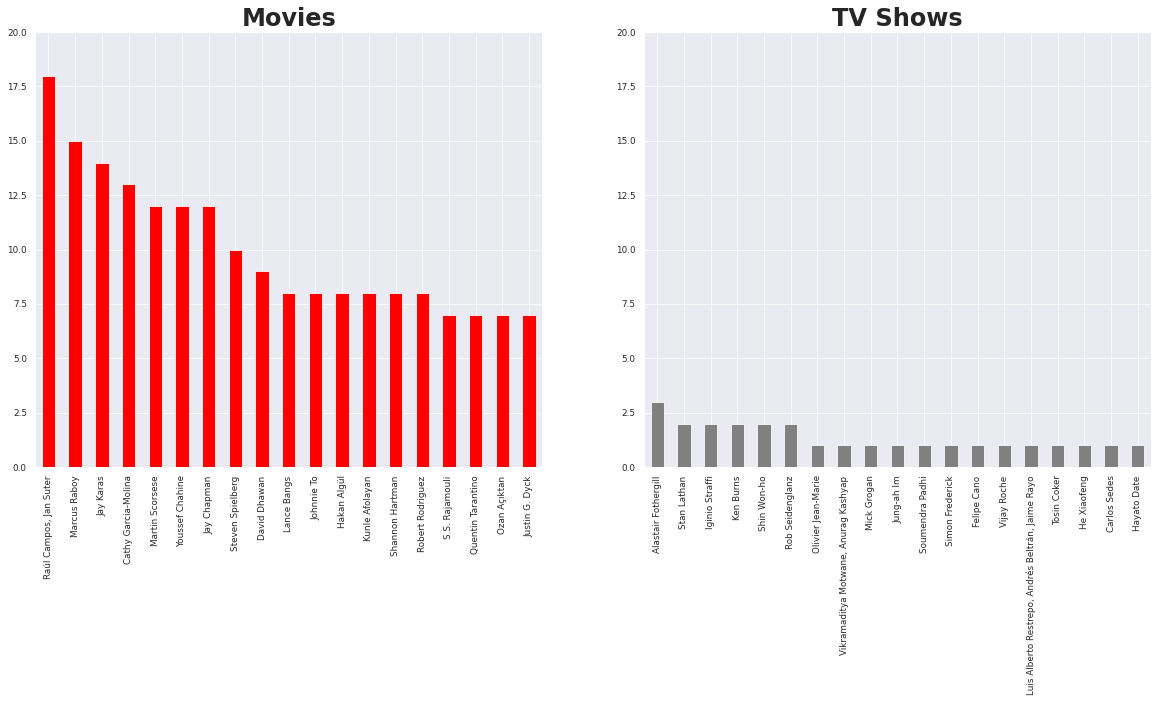

In [18]:
df_movie = df.query("type == 'Movie'")
df_tvshow = df.query("type == 'TV Show'")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
df_movie.director.value_counts()[1:20].plot(kind="bar", color="red", ax=ax1, ylim=(0, 20))
df_tvshow.director.value_counts()[1:20].plot(kind="bar", color="grey", ax=ax2, ylim=(0, 20))
ax1.set_title("Movies", fontsize=24, fontweight="bold")
ax2.set_title("TV Shows", fontsize=24, fontweight="bold");

As we can see, the tv show data is less relevant regarding the director frequency since most of them can be found only once.

### Which are the most frequent actors in our dataset?
Similar to the directors frequency we can ask for the **actors frequency**.

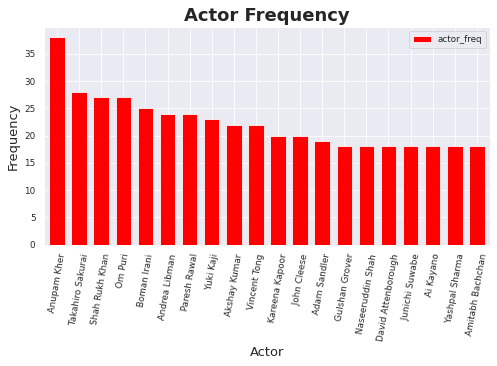

In [19]:
# extract all actors from "cast"
data = [x.split(",") for x in df.cast.to_list()]
data = list(itertools.chain(*data))

# get data histogram
element = Counter(data)

# cast element data into DataFrame
df_cast = (pd.DataFrame.from_dict(element, orient="index", columns=["actor_freq"])
           .reset_index().
           rename(columns={"index":"cast"})
           .sort_values(by="actor_freq", ascending=False)
           .query("cast != 'missing'")
           .reset_index(drop=True)
)

# plot values
df_cast.head(20).plot(
    kind="bar", 
    x="cast", 
    y="actor_freq", 
    color="red",
    figsize=(8,4),
    width=0.7, 
    title="Actor Frequency",
    xlabel="Actor",
    ylabel="Frequency",
    rot=80,
);

### From which country can we find the most dataset entries?

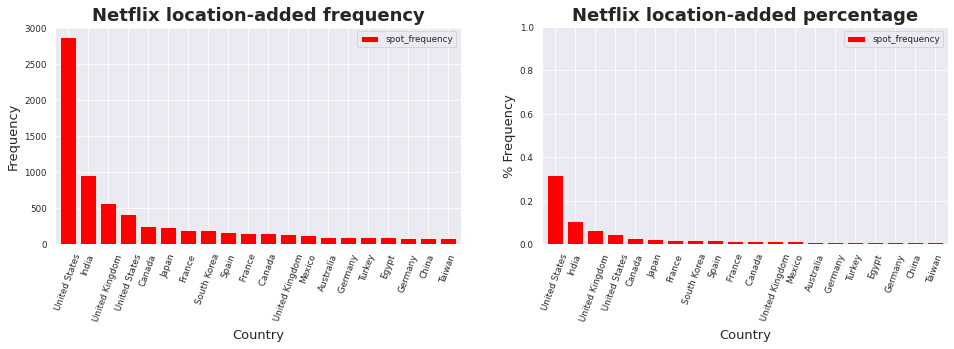

In [20]:
# get frequencies of all filming spot contries
spot_categories = [x.split(",") for x in df.country.to_list()]
spot_categories = list(itertools.chain(*spot_categories))

# get data histogram
spot_freq = Counter(spot_categories)

# cast histogram to DataFrame
spot_df = (pd.DataFrame.from_dict(spot_freq, orient="index", columns=["spot_frequency"])
           .reset_index()
           .rename(columns={"index":"country"})
           .sort_values(by="spot_frequency", ascending=False)
           .query("country != 'missing'")
           .reset_index(drop=True)
          )

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

# plot DataFrame histogram
spot_df.head(20).plot(
    kind="bar", 
    x="country", 
    y="spot_frequency",
    ax=ax1,
    color="red",
    #figsize=(8,4),
    width=0.8,
    xlabel="Country",
    ylabel="Frequency",
    title="Netflix location-added frequency",
    rot=70)

spot_df.assign(spot_frequency=lambda x: x.spot_frequency / spot_df.spot_frequency.sum()).head(20).plot(
    kind="bar", 
    x="country", 
    y="spot_frequency",
    ax=ax2,
    color="red",
    #figsize=(8,4),
    width=0.8,
    xlabel="Country",
    ylabel="% Frequency",
    ylim=(0,1),
    title="Netflix location-added percentage",
    rot=70);

Obvously, the United States are included overproporionally.

### Are there months where more shows or movies are added as normally?

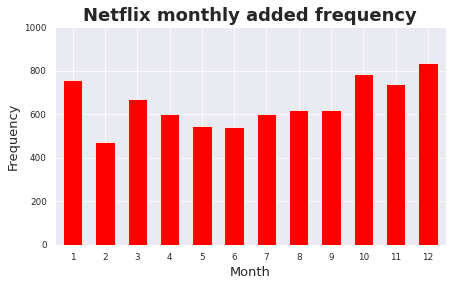

In [21]:
df.added_month.value_counts().plot(
    kind="bar", 
    x="month", 
    y="frequency", 
    color="red", 
    figsize=(7,4),
    rot=0,
    title="Netflix monthly added frequency",
    width=0.6,
    xlabel="Month",
    ylabel="Frequency",
    ylim=(0,1000),
);

We find a slightly sign that netflix adds more movies / shows when reaching the end of the year (including january as well). This can be interpreted with the motivation that netflix tries to be more attractive selling their subscription as a christmas present. This interpretation could conform with the local peak at march and may where a netflix subscription may be an easter present as well.

## How does the release frequency of movies / TV shows change over time?

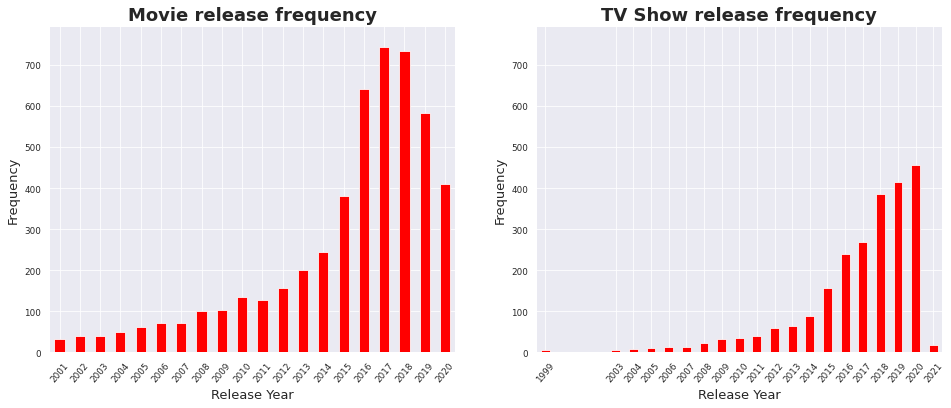

In [22]:
release_timeline = df.groupby('type')['release_year'].value_counts()

fig, (ax1, ax2) = plt.subplots(
    1, 
    2, 
    figsize=(16, 6), 
    subplot_kw={
        "ylim": (0, release_timeline.max() + 50),
    })
release_timeline["Movie"].head(20).plot(
    kind="bar",
    ax=ax1,
    color="red",
    rot=50,
    title="Movie release frequency", 
    xlabel="Release Year", 
    ylabel="Frequency",
)
release_timeline["TV Show"].head(20).plot(
    kind="bar", 
    ax=ax2,
    color="red",
    rot=50,
    title="TV Show release frequency", 
    xlabel="Release Year", 
    ylabel="Frequency",
);

It seems like netflix' *focus lies currently on tv shows*, although definitely more movies were added in the recent history. 

The *decreasing movie numbers* can be partially interpreted with the pandemic occurence of Covid and the corresponding problems for directors to produce new movies. But we can see the first decreasing numbers in 2018, long befor Covid was a problem. 

Keeping that in mind, it is more likely that netflix tries to change his *focus from movies towards creating and adding more and more tv shows*, because this is what customer will bind to the company and leads to keeping subscriptions alive from the perspective of their customers.

### Which categories are the most represented in our dataset?

In [23]:
data = [x.split(",") for x in df.listed_in.to_list()]
data = list(itertools.chain(*data))

listed_count = Counter(data)

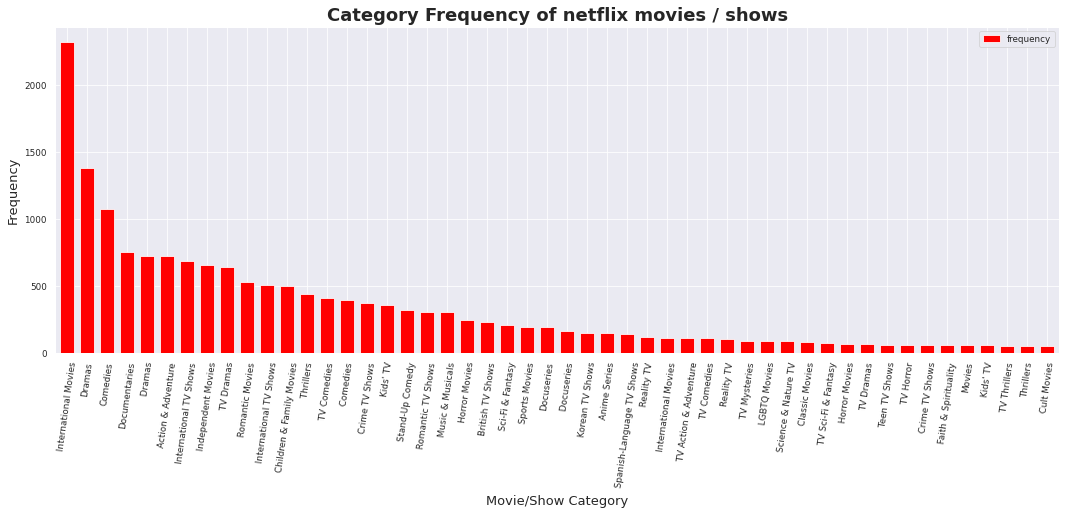

In [24]:
# create DataFrame from listed_in frequencies using listed_dic
listed_in_freq = (pd.DataFrame
    .from_dict(listed_count, orient="index", columns=["frequency"])
    .sort_values(by=["frequency"], ascending=False)
)

# plot frequencies
listed_in_freq.head(50).plot(
    kind="bar",
    color="red",
    figsize=(18, 6),
    rot=82,
    title="Category Frequency of netflix movies / shows",
    width=0.7,
    xlabel="Movie/Show Category",
    ylabel="Frequency",
);

Interesingly, `International Movies`, `Dramas` and `Comedies` are the top 3 categories, followed by `Documentaries`.

### How many seasons are most frequent in our tv show dataset?

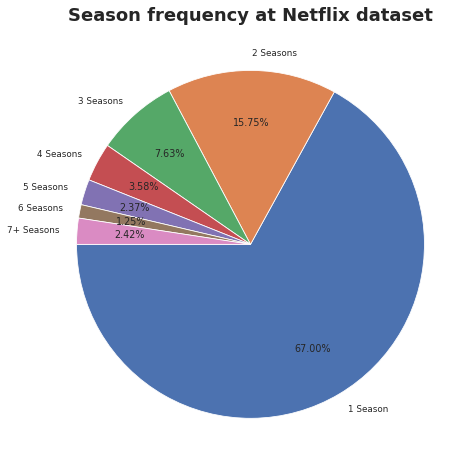

In [25]:
# filter only Season entries and count values
season_freq = df.query("duration_unit == 'Season'").duration_quantity.value_counts()

# use sum aggregation for count values below a specific threshold 
threshold = 30
season_freq_restagg = season_freq[season_freq >= threshold] 
season_freq_restagg["Rest"] = season_freq[season_freq < threshold].sum()

# create chart display lables
season_label = ["1 Season"] + [str(season_int) + " Seasons" for season_int in season_freq_restagg.index[1:-1]] + ["7+ Seasons"]

season_freq_restagg.plot(
    kind="pie", 
    autopct='%1.2f%%',
    figsize=(10,8),
    labels=season_label,
    pctdistance=0.7,
    startangle=180,
    title="Season frequency at Netflix dataset",
    ylabel="",
    
);

There is another surprising insight. Two of three netflix tv shows consist of only one season. Only one of three tv shows consist of more or equal than two seasons. We can conclude that tv shows like `Game of thrones` is one of the most successful productions of netflix but at the same time it is a quite rare show (<1.25%).

### How is the movie duration distributed?

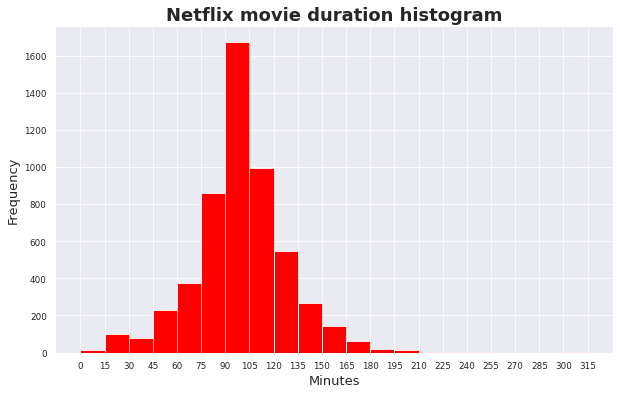

In [26]:
# create binsizes
bins = [*range(0,316,15)]

df.query("duration_unit == 'Minute'").duration_quantity.plot(
    kind="hist", 
    bins=bins, 
    color="red",
    figsize=(10,6),
    title="Netflix movie duration histogram",
)
plt.xticks(bins);
plt.xlabel("Minutes");

As we expected, the most movies will end after 90-105 minutes.

### Just a final view on netflix ratings

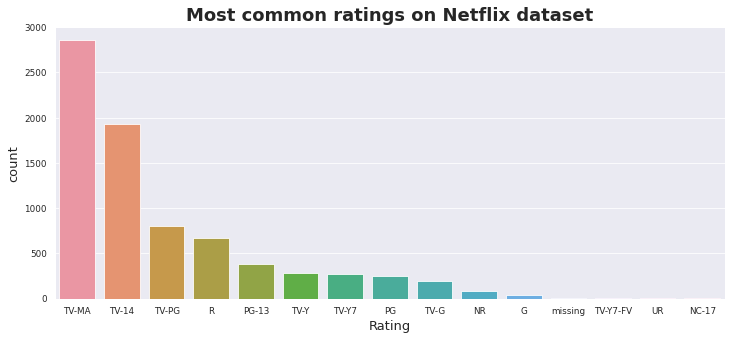

In [27]:
_, ax = plt.subplots(figsize=(12,5))
sns.countplot(
    x="rating", 
    data=df, 
    order=df.rating.value_counts().index.to_list(),
)
ax.set_title("Most common ratings on Netflix dataset")
ax.set_xlabel("Rating")
ax.set_ylabel("count");

# Creating a Recommender System

## First Approach: Tf-idf

### Theoretical background
This approach uses the *scikit-learn* learn library. The term **_Tf-idf_** stands for **_term frequency-inverse document frequency_**, which designates a way to create a metric which aims to score the importance of a specific word for a given document.

In general, one will consider not just one document but multiple documents $d_i$ in a so called corpus $C=\{d_i | 1 \leq i \leq n\}$. There are vaious ways to calculate Tf-idf (see Wikipedias article on [Tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf#Definition) for details. **NOTE**: we omit the idf-parameter $D$ which counts the documents whose contain the term $t$ for the sake of simplicity).

We add some insights from the Tfidf function:
* $\text{tfidf}(t,d)=0$ means that $t$ is not necessary for the document $d$
* if a term $t$ is not contained in a document $d$ (term-frequency is $0$), then $\text{tfidf}(t,d)=0$
* if a term $t$ occurs in every document of the corpus $C$ (inverse-document-frequency is $0$), then $\text{tfidf}(t,d)=0$ as well
* $\text{tfidf}(t,d)=0$, if $t$ occurs in every document (e.g. common words like "the")
* $\text{tfidf} \geq 0$


It's important to understand that Tf-idf is a metric $\text{tfidf}(t,d)$ for one term $t$ in a given document $d$. Once being aware of that thing we can go on calculating all values $\text{tfidf}(t_i,d_j)$ for all the documents $d_j \in C$ and where $t_i$ for $1 \leq i \leq m$ were all the different terms (words) occurring in all document in $C$.

Given a random term $\bar{t}$ in one of the documents $d_i$ and another random document $\bar{d}$ in the corpus $C$, then the _Tf-idf_ metric itself can be evaluated on $\bar{t}$ and $\bar{d}$ given by $\text{tfidf}(\bar{t}, \bar{d})$. 

The interpretation of the resulting score answers the question on **how important is the term $\bar{t}$ with respect to the document $\bar{d}$**. A zero value can be interpreted as the term $\bar{t}$ is not important for the document $\bar{d}$ beacuse that document does not contain that term. With an increasing _Tf-idf_ score the importance increases as well.

With that understanding we can arrange our scores as follows:

$$
\begin{pmatrix}
\text{tfidf}(t_1, d_1) & \text{tfidf}(t_2, d_1) & \cdots & \text{tfidf}(t_n, d_1)\\ 
\text{tfidf}(t_1, d_2) & \text{tfidf}(t_2, d_2) & & \\ 
& & \ddots & \vdots\\
\text{tfidf}(t_1, d_m) & & \cdots & \text{tfidf}(t_n, d_m)\\
\end{pmatrix} =: \left(x_1, \cdots , x_n\right) \in \mathbf{R}^{m \times n}
$$

Normalizing these vectors $x_i$ leads to the following representation

$$
\left(\frac{x_1}{\lVert x_1 \rVert}, \cdots , \frac{x_n}{\lVert x_n \rVert} \right) =: X \in \mathbf{R}^{m \times n}
$$

Understanding this matrix as a bunch of vectors, we can calculate the similarity between these vectors using the **cosine similarity** (see [here](https://www.machinelearningplus.com/nlp/cosine-similarity/#2whatiscosinesimilarityandwhyisitadvantageous) for a vivid interpretation), which is defined as 
$$\text{cossim}(X, X) = X X^T =: Y_{cos} \in \mathbf{R}^{m \times m}$$.

#### **How can we interpret these values in our similarity matrix $Y_{cos}$?**

To answer that question we take a look at any arbitrary position $y_{ij} \in Y_{cos}$ with $1 \leq i,j \leq m$. Analyzing the above calculation we see that we're comparing the importance of all terms $t_k$ for the document $d_i$ with the importance of the same term for document $d_j$ by multiplying both importance scores pairwise:

$$\begin{align} y_{ij} & = \frac{x_i x_j^{T}}{\lVert x_i \rVert \lVert x_j \rVert} \\
            & = \frac{1}{\lVert x_i \rVert \lVert x_j \rVert}\begin{pmatrix} \text{tfidf}(t_1, d_i) & \cdots & \text{tfidf}(t_m, d_i) \end{pmatrix} * \begin{pmatrix} \text{tfidf}(t_1, d_j) \\ \vdots \\ \text{tfidf}(t_m, d_j) \end{pmatrix} \\
            & = \frac{1}{\lVert x_i \rVert \lVert x_j \rVert} \sum^{m}_{k=1} \text{tfidf}(t_k, d_i)*\text{tfidf}(t_k, d_j)  \quad \text{with} \quad x_i, x_j \in X
            \end{align}$$

General speaking, we can say that **$y_{ij}$ compares the importance scores of two documents $d_{i}$ and $d_{j}$ ($1\leq i,j \leq m$) with respect to ALL given terms $t_k$** ($1\leq k \leq n$). If we now follow the hypthesis that similar documents are more likely to contain similar important terms, then we got our final interpretation model which can be sumarized as 

>**the higher a score $y_{ij}$ is, the more similar are the referring documents**.

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

netflix_df = df.copy()

# init vectorizer object
tfidf = TfidfVectorizer(stop_words="english")

# create tfidf matrix (X in above description)
X = tfidf.fit_transform(netflix_df.description)

print("Shape of Tfidf matrix X:\t", X.shape)
print("Tfidf matrix X:")
print(X.toarray())

Shape of Tfidf matrix X:	 (7777, 17893)
Tfidf matrix X:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.20813988 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


Our Tfidf matrx $X$ consists of $7777$ rows as expected which cooinces with the number of documents in our corpus (netflix DataFrame). We can also conclude, that these documents generate a word pool of 17893 words (excluding stop words), whose importance is measured (using $\text{tfidf}(t, D)$)  on all documents separately.

Next, we use the cosine similarity as mentioned above.

In [29]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(X, X)

# create index lookup on all netflix titles
indices = pd.Series(netflix_df.index, index=netflix_df['title']).drop_duplicates()

### How will we get from our cosine matrix to our recommendation?
The idea is currently straight forward. To receive a similar recommendation for any given title wich is contained in our DataFrame we just have to look for the referring index in our DataFrame. Since we concluded that any entry $y_{ij}$ in our cosine matrix $Y_{cos}$ indicates the similarity score wich we derived from comparing two documents $d_i$ and $d_j$, it is now clear that for a given document $d_i$ we just have to look for _that_ document $\bar{d}_j$ that generates the highest score $\bar{y}_{ij}$ with fixed parameter $i$.

That's basically all we will do next.

In [30]:
def get_tfidf_recommendation(
    title: str, indices: pd.Series, cosine_sim:np.ndarray) -> pd.DataFrame:
    """Generate similarity recommendations for a particular title based on tfidf.
        
    Args:
        title (str): title to find recommendations for (must be included in netflix_df)
        indices (pd.Series): Series maps netflix_df titles to corresponding indices
        cosine_matrix (np.ndarray): cosine matrix derived from TfidfVectorizer appplied 
                                    on netflix_df.description
    """
    # title index lookup 
    idx = indices[title]
    
    # create netflix DataFrame with similarity scores
    scores = pd.DataFrame(
        data={
            "score":cosine_sim[idx],
            "title":netflix_df["title"],
            "description":netflix_df["description"],
        }, 
        index=range(len(cosine_sim[idx]))
    ).sort_values(by="score", ascending=False)
    
    return scores

### Let's test it!

In [31]:
get_tfidf_recommendation("ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS", indices, cosine_sim)

,score,title,description
7776,1.000000,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,This documentary delves into the mystique behi...
5576,0.196906,SHOT! The Psycho-Spiritual Mantra of Rock,Aptly named iconic rock photographer Mick Rock...
5233,0.171923,Rock On!!,Four friends hoped that their rock band would ...
4550,0.159310,Oasis: Supersonic,This film details the rise of British rock gro...
3706,0.158531,Long Time Running,This documentary follows the 2016 tour of belo...
...,...,...,...
2707,0.000000,Herrens veje,A family with a storied history of service to ...
2706,0.000000,Heroine,One woman experiences the dramatic highs and l...
2704,0.000000,Heroes Wanted,"When its special ops agency is wiped out, Spai..."
2703,0.000000,HERO MASK,"After a rash of mysterious deaths, Crown prose..."


## Second approach: using pre-trained word2vec model from Google

### First let's normalize the text fragments using *str.lower* and *nltk.tokenize*
First using the method *str.lower* will modify strings to contain only lower-case characters.
After that we split a lower-cased sentence in a list containing all the single words from our sentence by using *nltk.tokenize*.

In [32]:
from nltk.tokenize import word_tokenize
df_netflix = (
    df.filter(["show_id", "title", "listed_in", "description"]).assign(
        title_list=lambda x: x.title.str.lower().apply(word_tokenize),
        listed_in=lambda x: x.listed_in.str.lower().apply(word_tokenize),
        description=lambda x: x.description.str.lower().apply(word_tokenize),
    )
)

### Removing stopwords and punctuations
Stopwords are common words used in every language which specify mostly nouns better. The provide us with a better understanding of the context but are not very significant words. Let's say you read the word 

> "book"

Then you will know that text is probably about books or literatur. Now, a common *stopword* would be `"his"` and reading

> "his book"

would let you know that your text is still about a book and someone who owns that book. But if you're mostly interested in classifying that sentence as literatur all your focus should stay on the word "book". Consequently, we can remove all these common stopwords from our list. Therefore we may want to use *nltk.corpus.stopwords*.

With a similar argumentation, we can remove punctuations as well, using *string.punctuation*.

In [33]:
from nltk.corpus import stopwords
from string import punctuation
from typing import List
stopword_list = stopwords.words("english") + list(punctuation)

def remove_stopwords(list_input: List[str]) -> List[str]:
    """Filter stopwords from list."""
    return list(filter(lambda word: word not in stopword_list, list_input))

def remove_punctuation(input_list: List[str]) -> List[str]:
    """Remove punctionations from words in list.
    
    str.maketrans creates a dict mapping with characters to interchange, 
    whereby the third parameter the characters describes which should be removed, 
    e.g.
        str.maketrans("abc","123",".") -> {97: 49, 98: 50, 99: 51, 46: None} 
        meaning, "a"->1, "b"->2, "c"->3 and remove "."
    """
    return [word.translate(str.maketrans('', '', punctuation)) for word in input_list]

def remove_empty_char(input_list: List[str]) -> List[str]:
    """Remove empty strings (strings with len==0)."""
    return list(filter(lambda x: len(x)>0, input_list))

# remove stopwords, punctuations and empty strings
df_netflix = df_netflix.assign(
    title_list=lambda df: df.filter(["title_list"]).applymap(lambda x: remove_stopwords(x)),
    listed_in=lambda df: df.filter(["listed_in"]).applymap(lambda x: remove_stopwords(x)),
    description=lambda df: df.filter(["description"]).applymap(lambda x: remove_stopwords(x)),
    description_pt1=lambda df: df.filter(["description"]).applymap(lambda x: remove_punctuation(x)),
    description_pt2=lambda df: df.filter(["description_pt1"]).applymap(lambda x: remove_empty_char(x)),
).drop(columns=["description", "description_pt1"]).rename(columns={"description_pt2": "description"})

### Drop duplicates using sets
It's common practice to remove duplicates using first set and casting them afterwards back to lists.

In [34]:
# remove duplicates
df_netflix = df_netflix.assign(
    title_list=lambda df: df.title_list.apply(lambda x: list(set(x))),
    listed_in=lambda df: df.listed_in.apply(lambda x: list(set(x))),
    description=lambda df: df.description.apply(lambda x: list(set(x))),
)

### Download pretrained word2vec model from Google


In [35]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
!gunzip GoogleNews-vectors-negative300.bin.gz

--2021-04-21 17:47:50--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.17.211
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.17.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  34.0MB/s    in 52s     

2021-04-21 17:48:43 (30.0 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [36]:
import gensim

wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

In [37]:
matrix_netflix_vocab = []
for list_ in df_netflix.to_numpy():
    list_[2] = [word for word in list_[2] if word in wv.vocab]
    list_[3] = [word for word in list_[3] if word in wv.vocab]
    list_[4] = [word for word in list_[4] if word in wv.vocab]
    matrix_netflix_vocab.append(list_)
df_netflix_vocab = pd.DataFrame(matrix_netflix_vocab, columns=df_netflix.columns)

In [38]:
df_netflix_vocab

,show_id,title,listed_in,title_list,description
0,s1,3%,"[dramas, tv, shows, international, fantasy]",[3],"[paradise, far, inhabit, one, elite, 3, squalo..."
1,s2,7:19,"[dramas, movies, international]",[],"[devastating, walks, wait, city, desperately, ..."
2,s3,23:59,"[horror, movies, international]",[],"[haunting, recruit, training, secret, army, de..."
3,s4,9,"[adventure, action, independent, movies, fantasy]",[9],"[group, world, machines, ragdoll, robots, exte..."
4,s5,21,[dramas],[],"[intent, vegas, students, las, experts, casino..."
...,...,...,...,...,...
7772,s7783,Zozo,"[dramas, movies, international]",[],"[search, little, lebanon, war, escapes, grandp..."
7773,s7784,Zubaan,"[dramas, musicals, music, movies, international]",[],"[truth, tycoon, music, way, dysfunctional, pas..."
7774,s7785,Zulu Man in Japan,"[musicals, music, movies, documentaries, inter...","[japan, zulu, man]","[introducing, rapper, c, city, culture, sights..."
7775,s7786,Zumbo's Just Desserts,"[shows, tv, international, reality]",[desserts],"[willy, competition, dessert, looks, prize, ad..."


In [39]:
df_netflix

,show_id,title,listed_in,title_list,description
0,s1,3%,"[dramas, tv, shows, international, fantasy]",[3],"[paradise, far, inhabit, one, elite, 3, squalo..."
1,s2,7:19,"[dramas, movies, international]",[],"[devastating, walks, wait, city, desperately, ..."
2,s3,23:59,"[horror, movies, international]",[],"[haunting, recruit, training, secret, army, de..."
3,s4,9,"[adventure, action, independent, movies, fantasy]",[9],"[group, world, machines, ragdoll, robots, exte..."
4,s5,21,[dramas],[],"[intent, vegas, students, las, experts, casino..."
...,...,...,...,...,...
7772,s7783,Zozo,"[dramas, movies, international]",[],"[search, little, lebanon, war, escapes, grandp..."
7773,s7784,Zubaan,"[dramas, musicals, music, movies, international]",[],"[truth, tycoon, music, way, dysfunctional, pas..."
7774,s7785,Zulu Man in Japan,"[musicals, music, movies, documentaries, inter...","[japan, zulu, man]","[introducing, rapper, c, city, culture, sights..."
7775,s7786,Zumbo's Just Desserts,"[shows, tv, international, reality]",[desserts],"[willy, competition, dessert, looks, prize, ad..."


In [40]:
from tqdm import tqdm

def recommendation(title):
    matrix_netflix_title_vocab = []
    for list_ in df_netflix[df_netflix['title'] == title].to_numpy():
        list_[2] = [word for word in list_[2] if word in wv.vocab]
        list_[3] = [word for word in list_[3] if word in wv.vocab]
        list_[4] = [word for word in list_[4] if word in wv.vocab]
        matrix_netflix_title_vocab.append(list_)

    matrix_similarity = []
    pbar = tqdm(matrix_netflix_vocab)
    for list1 in pbar:
        for list2 in matrix_netflix_title_vocab:
            score_catg = wv.n_similarity(list1[2], list2[2])
            score_desc = wv.n_similarity(list1[3], list2[3])
            try:
                score_title = wv.n_similarity(list1[4], list2[4])/2
            except:
                score_title = 0
            if ((list1[1] != list2[1]) & (score_catg > 0.85)):
                matrix_similarity.append([list1[1], list2[1], score_title, score_catg, score_desc])
        pbar.update()
    pbar.close()
    df_netflix_similarity = pd.DataFrame(matrix_similarity, columns = ['recommendation','title','score_title', 'score_category', 'score_description'])
    df_netflix_similarity['final_score'] = df_netflix_similarity['score_title'] + df_netflix_similarity['score_category'] + df_netflix_similarity['score_description']
    return (df_netflix_similarity.sort_values(by=['final_score', 'score_category', 'score_description', 'score_title'], ascending=False).head(10))

In [41]:
recommendation('Game of thrones')

100%|██████████| 7777/7777 [00:00<00:00, 557715.43it/s]


,recommendation,title,score_title,score_category,score_description,final_score


In [42]:
recommendation('Friends')

100%|██████████| 7777/7777 [00:00<00:00, 562932.13it/s]


,recommendation,title,score_title,score_category,score_description,final_score
